#### Data Cleaning and Analysis: Employee Exit Surveys

We have two datasets from two different educational institutions in Australia, DETE and TAFE.

For this project, we will demonstrate data cleaning skills by preparing data from two CSV files for analysis. We want to know the following:

- Between the two institutions why are people leaving? How does this change depending on the length of service? And depending on age?

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

In [1]:
import pandas as pd
import re
import numpy as np

import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

In [2]:
dete_survey = pd.read_csv('data/dete_survey.csv')
tafe_survey = pd.read_csv('data/tafe_survey.csv')

***
__Initial data exploration steps.__

__Let's look at the DETE dataset first.__

We will explore our dataset, look at values of columns and remove/ fill in NULL values depending on our analysis.

In [3]:
print(dete_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
shape_dete_survey = dete_survey.shape
shape_dete_survey

(822, 56)

So it looks like for the analysis columns:

_"ID", "SeperationType", "Cease Date", "DETE Start Date", "Age", "Job dissatisfaction"_

are of interest to us.

Let's have a look for NULLs and inaccurate/ incomplete values.

In [5]:
dete_survey_trimmed = dete_survey.loc[:,['ID','SeparationType','Cease Date','DETE Start Date','Age', 'Job dissatisfaction']]

In [6]:
print(dete_survey_trimmed.isnull().sum())

ID                      0
SeparationType          0
Cease Date              0
DETE Start Date         0
Age                    11
Job dissatisfaction     0
dtype: int64


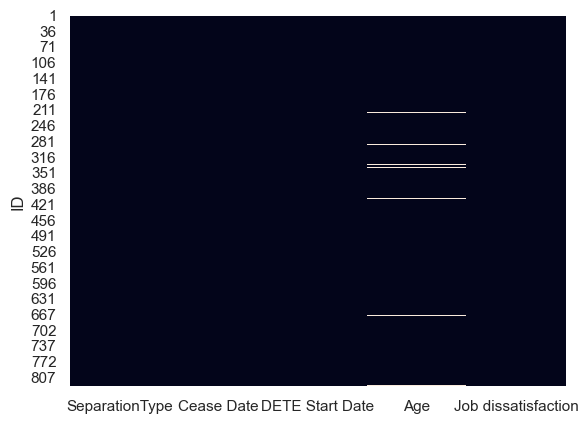

In [7]:
dete_survey_trimmed_record_index = dete_survey_trimmed.set_index('ID')
sns.heatmap(dete_survey_trimmed_record_index.isnull(), cbar=False)
plt.show()

We have a relatively good dataset here from the respect of NULL values. You can see from the heatmap above that most of data is non-NULL (black) with a small slither of NULLs (grey) in the "Age" column.

Let's look at the NULLs now:

In [8]:
missing = dete_survey_trimmed['Age'].isnull()
dete_survey_trimmed_missing_age = dete_survey_trimmed[missing]

In [9]:
dete_survey_trimmed_missing_age

,ID,SeparationType,Cease Date,DETE Start Date,Age,Job dissatisfaction
123,124,Ill Health Retirement,2012,Not Stated,NaN,False
172,173,Other,2012,1975,NaN,False
214,215,Resignation-Other reasons,2012,1999,NaN,False
285,286,Resignation-Move overseas/interstate,2012,2012,NaN,False
329,330,Voluntary Early Retirement (VER),2013,1971,NaN,False
336,337,Other,2012,Not Stated,NaN,False
405,406,Resignation-Other reasons,2012,Not Stated,NaN,False
665,667,Age Retirement,07/2014,1991,NaN,True
708,710,Ill Health Retirement,Not Stated,Not Stated,NaN,False
802,804,Resignation-Move overseas/interstate,12/2013,Not Stated,NaN,False


We will fill the records with NULL in the "Age" column with "Not Stated" as there is usable information in the other columns. 

In [10]:
dete_survey_trimmed= dete_survey_trimmed.fillna("Not Stated")

Exploring the values in each column of interest:

In [11]:
print(dete_survey_trimmed['Age'].value_counts())

Age
61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
Not Stated        11
20 or younger      1
Name: count, dtype: int64


In [12]:
print(dete_survey_trimmed['SeparationType'].value_counts())

SeparationType
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64


In [13]:
print(dete_survey_trimmed['DETE Start Date'].value_counts())

DETE Start Date
Not Stated    73
2011          40
2007          34
2008          31
2010          27
2012          27
2009          24
2006          23
1970          21
2013          21
1975          21
2005          20
1990          20
1996          19
1999          19
2000          18
1992          18
2004          18
1991          18
1989          17
1976          15
2002          15
1978          15
2003          15
1988          15
1974          14
1980          14
1995          14
1998          14
1997          14
1979          14
1993          13
1986          12
1972          12
1977          11
1971          10
2001          10
1984          10
1969          10
1994          10
1981           9
1983           9
1985           8
1973           8
1987           7
1963           4
1982           4
1968           3
1967           2
1966           1
1965           1
Name: count, dtype: int64


In [14]:
print(dete_survey_trimmed['Cease Date'].value_counts())

Cease Date
2012          344
2013          200
01/2014        43
12/2013        40
Not Stated     34
09/2013        34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
04/2014         2
07/2014         2
08/2012         2
04/2013         2
02/2014         2
11/2012         1
09/2010         1
2010            1
2014            1
07/2012         1
09/2014         1
07/2006         1
Name: count, dtype: int64


In [15]:
print(dete_survey_trimmed['Job dissatisfaction'].value_counts())

Job dissatisfaction
False    733
True      89
Name: count, dtype: int64


Conclusions:

- DEFE data is quite complete. No NULL values but some as "Not Stated". Something to consider.

- We need to create a length of employment column.

- Our column values and headers will need to be made consistent over both data sets.





__Now let's move our attention to the TAFE dataset.__

Following the same steps as above we will explore our dataset, look at values of columns and most importantly maintain consistency as our process involves joining these datasets together to perform a group analysis.

In [16]:
print(tafe_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [17]:
shape_tafe_survey = tafe_survey.shape
shape_tafe_survey

(702, 72)

So it looks like for the analysis columns:

_"Record ID", "Contributing Factors. Job Dissatisfaction", "Reason for ceasing employment", "LengthofServiceOverall. Overall Length of Service at Institute (in years)", "CurrentAge. Current Age"_

are of interest to us.

It looks as if our:

_"Contributing Factors. Job Dissatisfaction"_

column contains many NULLs. Let's look at it first:

In [18]:
print(tafe_survey['Contributing Factors. Job Dissatisfaction'].value_counts())

Contributing Factors. Job Dissatisfaction
-                      360
Job Dissatisfaction     77
Name: count, dtype: int64


Where there are not NULL values there are -'s which are about as much use!

Without making assumptions there is no way to determine whether a dash means Job Dissatisfaction or N/A. 

Our DETE dataset gives us a much cleaner and accurate view of Job Dissatisfaction. Therefore, we are comfortable to remove these columns from our investigation of the TAFE survey.

In [19]:
tafe_survey_trimmed = tafe_survey.loc[:,['Record ID','Reason for ceasing employment','LengthofServiceOverall. Overall Length of Service at Institute (in years)','CurrentAge. Current Age']]

In [20]:
print(tafe_survey_trimmed.isnull().sum())

Record ID                                                                      0
Reason for ceasing employment                                                  1
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
CurrentAge. Current Age                                                      106
dtype: int64


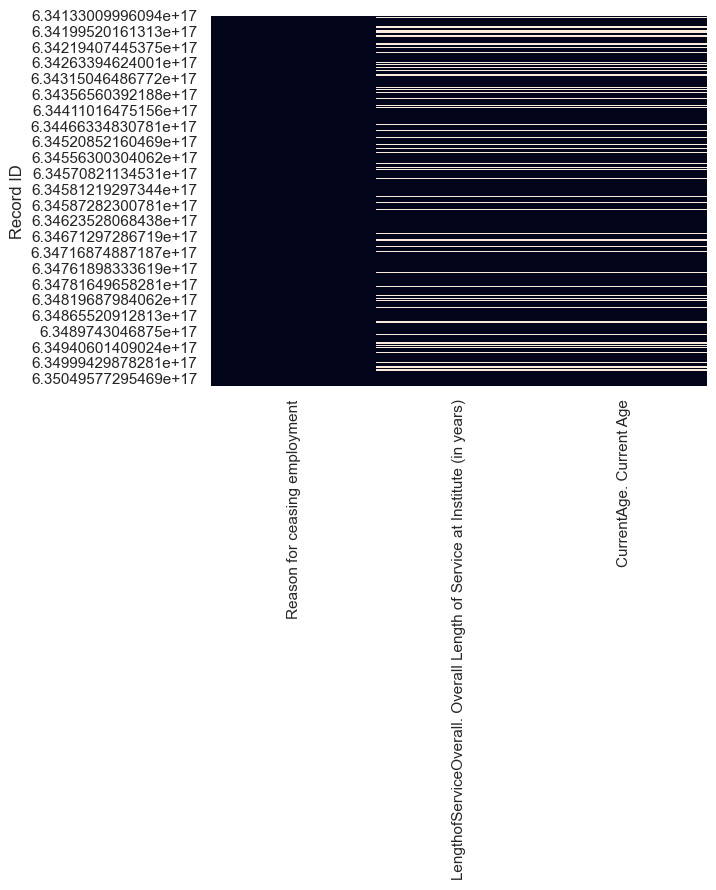

In [21]:
tafe_survey_trimmed_record_index = tafe_survey_trimmed.set_index('Record ID')
sns.heatmap(tafe_survey_trimmed_record_index.isnull(), cbar=False)
plt.show()

In [22]:
missing = tafe_survey_trimmed['Reason for ceasing employment'].isnull()
tafe_survey_trimmed_missing_termination_reason = tafe_survey_trimmed[missing]
tafe_survey_trimmed_missing_termination_reason

,Record ID,Reason for ceasing employment,LengthofServiceOverall. Overall Length of Service at Institute (in years),CurrentAge. Current Age
324,6.345804e+17,NaN,NaN,NaN


Let's look at this record to see if we can obtain some useful information from other columns, specifically to fill in the "Reason for ceasing employment" column.

In [23]:
tafe_survey_index324 = tafe_survey.loc[[324],:]

In [24]:
tafe_survey_index324 = tafe_survey_index324.loc[:, tafe_survey_index324.notnull().all()]

In [25]:
print(tafe_survey_index324)

        Record ID                         Institute                  WorkArea  \
324  6.345804e+17  Sunshine Coast Institute of TAFE  Non-Delivery (corporate)   

     CESSATION YEAR  
324          2011.0  


From the above analysis it looks as if the only non-NULL entries for this record are not usable to help us fill in a column of interest and therefore won't help us answer any of our goals. Further, as it is just one record we will remove it from our studies.

In [26]:
tafe_survey_trimmed = tafe_survey_trimmed.drop(324)

In [27]:
print(tafe_survey_trimmed.isnull().sum())

Record ID                                                                      0
Reason for ceasing employment                                                  0
LengthofServiceOverall. Overall Length of Service at Institute (in years)    105
CurrentAge. Current Age                                                      105
dtype: int64


Record confirmed as removed.

In [28]:
rows_with_nulls = tafe_survey_trimmed[tafe_survey_trimmed.isnull().any(axis=1)]
rows_with_nulls

,Record ID,Reason for ceasing employment,LengthofServiceOverall. Overall Length of Service at Institute (in years),CurrentAge. Current Age
1,6.341337e+17,Retirement,NaN,NaN
2,6.341388e+17,Retirement,NaN,NaN
3,6.341399e+17,Resignation,NaN,NaN
16,6.341770e+17,Resignation,NaN,NaN
18,6.341779e+17,Resignation,NaN,NaN
...,...,...,...,...
672,6.350132e+17,Retirement,NaN,NaN
690,6.350496e+17,Resignation,NaN,NaN
692,6.350592e+17,Contract Expired,NaN,NaN
694,6.350652e+17,Resignation,NaN,NaN


Regarding the values with NULL in the "LengthOfServiceOverall" and "CurrentAge" columns. It may be prudent to keep them, but fill them with "Not Stated". This is because the "Reason for ceasing employment" column is filled out so we can still get some usable insight from these records. We can just be sure to remove them from the scope of our age/ length of service related questions.

In [29]:
tafe_survey_trimmed= tafe_survey_trimmed.fillna("Not Stated")

In [30]:
print(tafe_survey_trimmed['CurrentAge. Current Age'].value_counts())

CurrentAge. Current Age
56 or older      162
Not Stated       105
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: count, dtype: int64


In [31]:
print(tafe_survey_trimmed['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts())

LengthofServiceOverall. Overall Length of Service at Institute (in years)
Less than 1 year      147
Not Stated            105
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: count, dtype: int64


In [32]:
print(tafe_survey_trimmed['Reason for ceasing employment'].value_counts())

Reason for ceasing employment
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64


Conclusions:

- TAFE data is relatively quite incomplete.

- We have no Job Dissatisfaction data for this dataset.

- Our column values and headers will need to be made consistent over both data sets.

***
__Creating consistency between our datasets__

We will go through column by column on each dataset to create consistent values and headers.

__First, age:__

In [33]:
print(tafe_survey_trimmed['CurrentAge. Current Age'].value_counts())

CurrentAge. Current Age
56 or older      162
Not Stated       105
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: count, dtype: int64


In [34]:
print(dete_survey_trimmed['Age'].value_counts())

Age
61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
Not Stated        11
20 or younger      1
Name: count, dtype: int64


A range is OK but we need to create consistent ranges. Changes that need to be made:

- Introduce dashes into the ranges on the TAFE dataset.

- Join the figures for 56-60 & 61 or older together and create a 56 or older category for the DETE dataset.

- Rename the column for both.

In [35]:
input_regex_string = r'(\d+)\s+(\d+)'
output_regex_string = r'\1-\2'

In [36]:
tafe_survey_trimmed['CurrentAge. Current Age'] = tafe_survey_trimmed['CurrentAge. Current Age'].apply(lambda x: re.sub(input_regex_string, r'\1-\2', x))
tafe_survey_trimmed['CurrentAge. Current Age'] = tafe_survey_trimmed['CurrentAge. Current Age'].str.strip()

tafe_survey_trimmed.rename(columns={'CurrentAge. Current Age': 'age'}, inplace=True)

In [37]:
dete_survey_trimmed['Age'] = dete_survey_trimmed['Age'].str.strip()
dete_survey_trimmed['Age'] = dete_survey_trimmed['Age'].str.replace('61 or older', '56-60')
dete_survey_trimmed['Age'] = dete_survey_trimmed['Age'].str.replace('56-60', '56 or older')


In [38]:
dete_survey_trimmed.rename(columns={'Age': 'age'}, inplace=True)

In [39]:
print(dete_survey_trimmed['age'].value_counts())

age
56 or older      396
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
Not Stated        11
20 or younger      1
Name: count, dtype: int64


In [40]:
print(tafe_survey_trimmed['age'].value_counts())

age
56 or older      162
Not Stated       105
51-55             82
41-45             80
46-50             59
31-35             52
36-40             51
26-30             50
21-25             44
20 or younger     16
Name: count, dtype: int64


__Now, we will create some consistency in length of service:__

In [41]:
print(tafe_survey_trimmed['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts())

LengthofServiceOverall. Overall Length of Service at Institute (in years)
Less than 1 year      147
Not Stated            105
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: count, dtype: int64


In [42]:
print(dete_survey_trimmed['DETE Start Date'].value_counts())

DETE Start Date
Not Stated    73
2011          40
2007          34
2008          31
2010          27
2012          27
2009          24
2006          23
1970          21
2013          21
1975          21
2005          20
1990          20
1996          19
1999          19
2000          18
1992          18
2004          18
1991          18
1989          17
1976          15
2002          15
1978          15
2003          15
1988          15
1974          14
1980          14
1995          14
1998          14
1997          14
1979          14
1993          13
1986          12
1972          12
1977          11
1971          10
2001          10
1984          10
1969          10
1994          10
1981           9
1983           9
1985           8
1973           8
1987           7
1963           4
1982           4
1968           3
1967           2
1966           1
1965           1
Name: count, dtype: int64


In [43]:
print(dete_survey_trimmed['Cease Date'].value_counts())

Cease Date
2012          344
2013          200
01/2014        43
12/2013        40
Not Stated     34
09/2013        34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
04/2014         2
07/2014         2
08/2012         2
04/2013         2
02/2014         2
11/2012         1
09/2010         1
2010            1
2014            1
07/2012         1
09/2014         1
07/2006         1
Name: count, dtype: int64


A range is OK but we need to create consistent ranges. We also do not have any length of service column in our DETE dataset. We need to calculate one. Changes that need to be made:

- Create a length of service column for DETE. We have a start date which is just a year, and a cease date that could be a year or could be a year and a month. For this we will use the following logic:

-- _If either start or end not stated, not stated as we cannot calculate length of service._

-- _For start date take the year value as is_

-- _For end date, if month/year format, if month<06 then year is as is_

--- _If month>06 then take the year as the following year._

-- __This is an assumption that I want to make clear.__


- Rename the column for both.

In [44]:
dete_survey_trimmed['year_ceased'] = pd.to_datetime(dete_survey_trimmed['Cease Date'], format='%m/%Y',errors='coerce')

dete_survey_trimmed['year_ceased'] = dete_survey_trimmed['year_ceased'].dt.year + (dete_survey_trimmed['year_ceased'].dt.month > 6).astype(int)

dete_survey_trimmed['year_left_job'] = dete_survey_trimmed['year_ceased'].combine_first(dete_survey_trimmed['Cease Date'])

In [45]:
print(dete_survey_trimmed['year_left_job'].value_counts())

year_left_job
2012          344
2013          200
2014.0        191
2013.0         40
Not Stated     34
2012.0          6
2015.0          3
2014            1
2010            1
2011.0          1
2007.0          1
Name: count, dtype: int64


The Not Stated values in our new columns are going to cause us a pain when we perform the mathematical comparison to calculate length of service. I will now replace them with NaN so we can perform our calculation. Within the calculation I will account for these NaN values.

In [46]:
values_to_replace = {'year_left_job': 'Not Stated',
                     'DETE Start Date': 'Not Stated'}

dete_survey_trimmed.replace(values_to_replace, np.nan, inplace=True)

In [47]:
dete_survey_trimmed['DETE Start Date'] = pd.to_numeric(dete_survey_trimmed['DETE Start Date'], errors='coerce')
dete_survey_trimmed['year_left_job'] = pd.to_numeric(dete_survey_trimmed['year_left_job'], errors='coerce')

In [48]:
def calculate_length_of_employment(row):
    diff = row['year_left_job'] - row['DETE Start Date']
    
    if diff < 1:
        return 'Less than 1 year'
    elif 1 <= diff <= 2:
        return '1-2'
    elif 3 <= diff <= 4:
        return '3-4'
    elif 5 <= diff <= 6:
        return '5-6'
    elif 7 <= diff <= 10:
        return '7-10'
    elif 11 <= diff <= 20:
        return '11-20'
    elif diff > 20:
        return 'More than 20 years'
    else:
        return 'Not Stated'

dete_survey_trimmed['length_of_service'] = dete_survey_trimmed.apply(calculate_length_of_employment, axis=1)

In [49]:
print(dete_survey_trimmed['length_of_service'].value_counts())

length_of_service
More than 20 years    302
11-20                 144
Not Stated            103
1-2                    70
7-10                   67
3-4                    62
5-6                    58
Less than 1 year       16
Name: count, dtype: int64


To remind us of the TAFE dataframe values:

In [50]:
print(tafe_survey_trimmed['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts())

LengthofServiceOverall. Overall Length of Service at Institute (in years)
Less than 1 year      147
Not Stated            105
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: count, dtype: int64


In [51]:
tafe_survey_trimmed.rename(columns={'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'length_of_service'}, inplace=True)

Our column names and values now match up for length of service.

__Now, we will create some consistency in reason for ceasing employment.__

In [52]:
print(dete_survey_trimmed['SeparationType'].value_counts())

SeparationType
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64


In [53]:
print(tafe_survey_trimmed['Reason for ceasing employment'].value_counts())

Reason for ceasing employment
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64


Our DETE dataset contains detail which is too granular for our investigation. We will therefore match categories.

Matching categories:

Age Retirement / I11 Health Retirement / VER = Retirement

Resignation-Other reasons / Resignation-Other employer / Resignation-Move overseas/interstate = Resignation

We will make these changes now and change the column name.


In [54]:
values_to_replace = {'Age Retirement': 'Retirement', 'Ill Health Retirement': 'Retirement', 'Voluntary Early Retirement (VER)': 'Retirement',
                     'Resignation-Other reasons': 'Resignation', 'Resignation-Other employer': 'Resignation', 'Resignation-Move overseas/interstate': 'Resignation'}

dete_survey_trimmed['SeparationType'].replace(values_to_replace, inplace=True)

In [55]:
print(dete_survey_trimmed['SeparationType'].value_counts())

SeparationType
Retirement          413
Resignation         311
Other                49
Contract Expired     34
Termination          15
Name: count, dtype: int64


In [56]:
dete_survey_trimmed.rename(columns={'SeparationType': 'reason_for_ceasing_employment'}, inplace=True)

In [57]:
tafe_survey_trimmed.rename(columns={'Reason for ceasing employment': 'reason_for_ceasing_employment'}, inplace=True)

Our column names and values now match up for reason for ceasing employment.

__Now, we will now rename the job dissatisfaction and ID columns, create a new column for each to decipher which data set is which, remove redundant columns and concatenate the two dataframes together.__

In [58]:
tafe_survey_trimmed

,Record ID,reason_for_ceasing_employment,length_of_service,age
0,6.341330e+17,Contract Expired,1-2,26-30
1,6.341337e+17,Retirement,Not Stated,Not Stated
2,6.341388e+17,Retirement,Not Stated,Not Stated
3,6.341399e+17,Resignation,Not Stated,Not Stated
4,6.341466e+17,Resignation,3-4,41-45
...,...,...,...,...
697,6.350668e+17,Resignation,1-2,51-55
698,6.350677e+17,Resignation,Not Stated,Not Stated
699,6.350704e+17,Resignation,5-6,51-55
700,6.350712e+17,Contract Expired,1-2,41-45


In [59]:
tafe_survey_trimmed.rename(columns={'Record ID': 'id'}, inplace=True)

tafe_survey_trimmed['institution'] = 'tafe'

tafe_survey_trimmed['job_dissatisfaction'] = 'N.A'

In [60]:
tafe_survey_trimmed

,id,reason_for_ceasing_employment,length_of_service,age,institution,job_dissatisfaction
0,6.341330e+17,Contract Expired,1-2,26-30,tafe,N.A
1,6.341337e+17,Retirement,Not Stated,Not Stated,tafe,N.A
2,6.341388e+17,Retirement,Not Stated,Not Stated,tafe,N.A
3,6.341399e+17,Resignation,Not Stated,Not Stated,tafe,N.A
4,6.341466e+17,Resignation,3-4,41-45,tafe,N.A
...,...,...,...,...,...,...
697,6.350668e+17,Resignation,1-2,51-55,tafe,N.A
698,6.350677e+17,Resignation,Not Stated,Not Stated,tafe,N.A
699,6.350704e+17,Resignation,5-6,51-55,tafe,N.A
700,6.350712e+17,Contract Expired,1-2,41-45,tafe,N.A


In [61]:
dete_survey_trimmed

,ID,reason_for_ceasing_employment,Cease Date,DETE Start Date,age,Job dissatisfaction,year_ceased,year_left_job,length_of_service
0,1,Retirement,08/2012,1984.0,56 or older,True,2013.0,2013.0,More than 20 years
1,2,Retirement,08/2012,NaN,56 or older,False,2013.0,2013.0,Not Stated
2,3,Retirement,05/2012,2011.0,56 or older,False,2012.0,2012.0,1-2
3,4,Resignation,05/2012,2005.0,36-40,False,2012.0,2012.0,7-10
4,5,Retirement,05/2012,1970.0,56 or older,False,2012.0,2012.0,More than 20 years
...,...,...,...,...,...,...,...,...,...
817,819,Retirement,02/2014,1977.0,56 or older,False,2014.0,2014.0,More than 20 years
818,820,Retirement,01/2014,1980.0,51-55,False,2014.0,2014.0,More than 20 years
819,821,Resignation,01/2014,2009.0,31-35,False,2014.0,2014.0,5-6
820,822,Retirement,12/2013,2001.0,41-45,False,2014.0,2014.0,11-20


In [62]:
dete_survey_trimmed.rename(columns={'ID': 'id', 'Job dissatisfaction':'job_dissatisfaction'}, inplace=True)
columns_to_drop = ['Cease Date', 'DETE Start Date', 'year_ceased', 'year_left_job']
dete_survey_trimmed = dete_survey_trimmed.drop(columns=columns_to_drop)
dete_survey_trimmed['institution'] = 'dete'

In [63]:
dete_survey_trimmed

,id,reason_for_ceasing_employment,age,job_dissatisfaction,length_of_service,institution
0,1,Retirement,56 or older,True,More than 20 years,dete
1,2,Retirement,56 or older,False,Not Stated,dete
2,3,Retirement,56 or older,False,1-2,dete
3,4,Resignation,36-40,False,7-10,dete
4,5,Retirement,56 or older,False,More than 20 years,dete
...,...,...,...,...,...,...
817,819,Retirement,56 or older,False,More than 20 years,dete
818,820,Retirement,51-55,False,More than 20 years,dete
819,821,Resignation,31-35,False,5-6,dete
820,822,Retirement,41-45,False,11-20,dete


In [64]:
combined = pd.concat([tafe_survey_trimmed, dete_survey_trimmed], axis=0, ignore_index=True)

combined

,id,reason_for_ceasing_employment,length_of_service,age,institution,job_dissatisfaction
0,6.341330e+17,Contract Expired,1-2,26-30,tafe,N.A
1,6.341337e+17,Retirement,Not Stated,Not Stated,tafe,N.A
2,6.341388e+17,Retirement,Not Stated,Not Stated,tafe,N.A
3,6.341399e+17,Resignation,Not Stated,Not Stated,tafe,N.A
4,6.341466e+17,Resignation,3-4,41-45,tafe,N.A
...,...,...,...,...,...,...
1518,8.190000e+02,Retirement,More than 20 years,56 or older,dete,False
1519,8.200000e+02,Retirement,More than 20 years,51-55,dete,False
1520,8.210000e+02,Resignation,5-6,31-35,dete,False
1521,8.220000e+02,Retirement,11-20,41-45,dete,False


We have a clean dataset that we understand including the limitations. Let's begin the analysis.
***

To remind us of our goals:

- __Between the two institutions why are people leaving? How does this change depending on the length of service? And depending on age?__

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

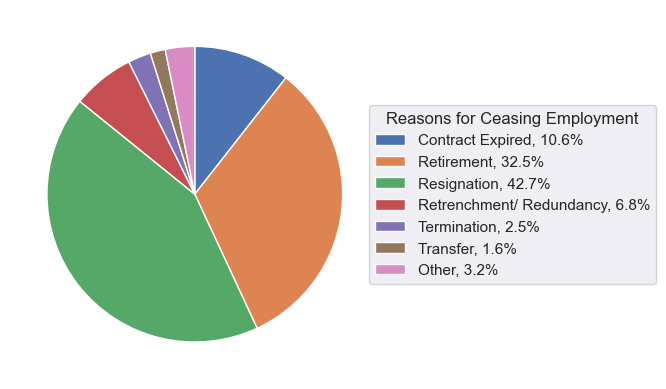

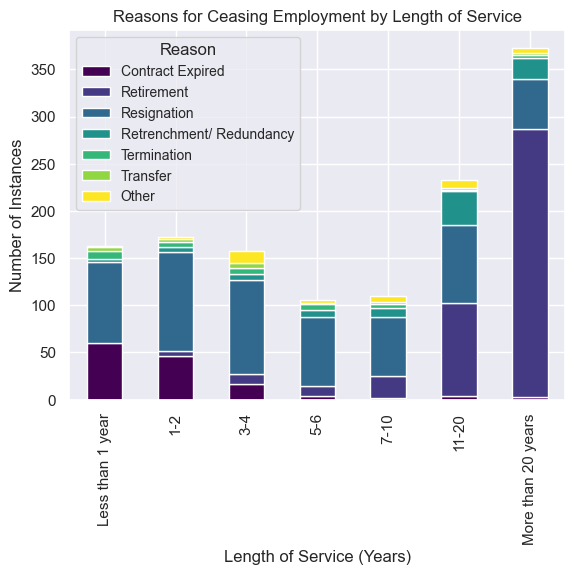

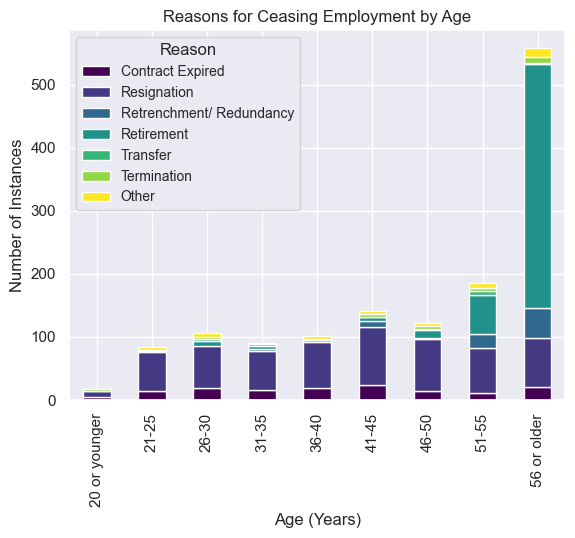

In [110]:
combined_complete_reasons = combined[combined['reason_for_ceasing_employment'] != 'Not Stated']

combined_pivot_reasons = combined_complete_reasons.pivot_table(columns='reason_for_ceasing_employment', values='id', aggfunc='count', sort=False)
combined_pivot_reasons_melt = pd.melt(combined_pivot_reasons)
combined_pivot_reasons_melt.set_index('reason_for_ceasing_employment', inplace=True)
combined_pivot_reasons_melt_helper = combined_pivot_reasons_melt.reset_index()

combined_pivot_reasons_melt_helper['%'] = (combined_pivot_reasons_melt_helper['value'] / combined_pivot_reasons_melt_helper['value'].sum()) * 100

labels = [f'{l}, {s:0.1f}%' for l, s in zip(combined_pivot_reasons_melt_helper['reason_for_ceasing_employment'], combined_pivot_reasons_melt_helper['%'])]

ax = combined_pivot_reasons_melt.plot(kind='pie',y='value',startangle=90, counterclock=False, labels=None)

ax.legend(labels, title="Reasons for Ceasing Employment", loc="center left", bbox_to_anchor=(0.95, 0, 0, 1))

ax.set_axis_off()

plt.show()


combined_pivot_reasons_by_service = combined_complete_reasons.pivot_table(index='length_of_service', columns='reason_for_ceasing_employment', values='id', aggfunc='count', sort=False)
combined_pivot_reasons_by_service = combined_pivot_reasons_by_service.reindex(['Less than 1 year', '1-2','3-4', '5-6', '7-10', '11-20', 'More than 20 years'], axis=0)

ax = combined_pivot_reasons_by_service.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Reasons for Ceasing Employment by Length of Service')
plt.xlabel('Length of Service (Years)')
plt.ylabel('Number of Instances')
plt.legend(title="Reason", fontsize='small', fancybox=True)

plt.show()

combined_complete_age = combined_complete_reasons[combined_complete_reasons['age'] != 'Not Stated']
combined_pivot_reasons_by_age = combined_complete_age.pivot_table(index='age', columns='reason_for_ceasing_employment', values='id', aggfunc='count', sort=False)
combined_pivot_reasons_by_age = combined_pivot_reasons_by_age.reindex(['20 or younger', '21-25','26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56 or older'], axis=0)

ax = combined_pivot_reasons_by_age.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Reasons for Ceasing Employment by Age')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Instances')
plt.legend(title="Reason", fontsize='small', fancybox=True)

plt.show()

To remind us of our goals:

- Between the two intitutions what split of reasons for leaving are there? How does this change depending on the length of service? And depending on age?

- __Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?__

In [66]:
only_dete = combined[(combined['institution'] == 'dete') & (combined['reason_for_ceasing_employment'] == 'Resignation') & (combined['length_of_service']!= 'Not Stated') & (combined['age'] != 'Not Stated')]

In [67]:
perc_of_people_resigning_with_job_dissatisfaction_service = only_dete.groupby('length_of_service')['job_dissatisfaction'].mean() * 100

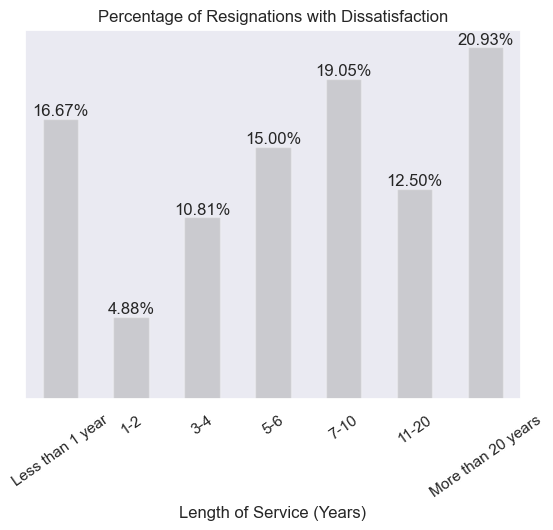

In [112]:
perc_of_people_resigning_with_job_dissatisfaction_service = perc_of_people_resigning_with_job_dissatisfaction_service.reindex(['Less than 1 year', '1-2','3-4', '5-6', '7-10', '11-20', 'More than 20 years'], axis=0)

ax = perc_of_people_resigning_with_job_dissatisfaction_service.plot(kind='bar', color='gray', alpha=0.3)
plt.title('Percentage of Resignations with Dissatisfaction')
plt.xlabel('Length of Service (Years)')
plt.xticks(rotation=35)
ax.grid(visible=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()-0.35),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.set_yticklabels([])
plt.show()